In [1]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras.utils as np_utils
from keras.models import Sequential
from keras import models, layers
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# resources:
# https://engmrk.com/lenet-5-a-classic-cnn-architecture/
# https://keras.io/
# https://github.com/ryanleeallred/MNIST-convnet-gridsearch/blob/master/param_tuning.ipynb

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [2]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train[0]

5

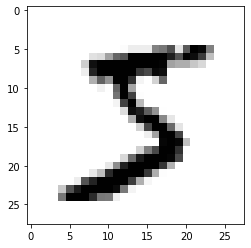

In [5]:
image = np.array(x_train[0], dtype='uint8')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray_r')

In [6]:
# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [7]:
def create_model(optimizer, activation_1, activation_2, activation_3, activation_4, kernel_size, pool_size, dropout_1, dropout_2):
    model = Sequential()
    # First convolutional layer
    model.add(layers.Conv2D(6, kernel_size=kernel_size, strides=(1, 1), activation=activation_1, input_shape=(28,28,1), padding="same"))

    # First pooling layer
    model.add(layers.AveragePooling2D(pool_size=pool_size, strides=(1, 1), padding='valid'))
    
    # Second convolutional layer
    model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation=activation_2, padding='valid'))
    
    # Second pooling layer
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    
    # Connected convolutional layer
    model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation=activation_3, padding='valid'))
    model.add(layers.Flatten())
    model.add(Dropout(dropout_1)) 
    # Connected layer
    model.add(layers.Dense(84, activation=activation_4))
    model.add(Dropout(dropout_2)) 
    # Output layer
    model.add(layers.Dense(10, activation='softmax'))
    
    # build/compile
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Nadam', metrics=["accuracy"])
    return model

In [8]:
#batch size
seed = 42
np.random.seed(seed)

param_grid = {'epochs': [3],
              'batch_size': [10, 50, 100, 120, 200],
              'optimizer': ['SGD'],
              'activation_1' : ['tanh'],
              'activation_2' : ['tanh'],
              'activation_3' : ['tanh'],
              'activation_4' : ['tanh'],
              'kernel_size' : [[5,5]],
              'pool_size' : [[2,2]],
              'dropout_1' : [0.25],
              'dropout_2' : [0.25]
             }

my_classifier = KerasClassifier(create_model)

grid = GridSearchCV(my_classifier, param_grid, cv=2, n_jobs=1, verbose=1)

grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print Test Accuracy
print("Test Accuracy", grid_result.score(x_test, y_test))
#BEST BATCH 120

Fitting 2 folds for each of 5 candidates, totalling 10 fits





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/3





30000/30000 [==============================] - 57s 2ms/step - loss: 0.5045 - acc: 0.8432
Epoch 2/3
30000/30000 [==============================] - 54s 2ms/step - loss: 0.3738 - acc: 0.8863
Epoch 3/3
30000/30000 [==============================] - 12s 405us/step
Epoch 1/3
30000/30000 [==============================] - 56s 2ms/step - loss: 0.4868 - acc: 0.8489
Epoch 2/3
30000/30000 [==============================] - 59s 2ms/step - loss: 0.3705 - acc: 0.8875
Epoch 3/3
30000/30000 [==============================] - 12s 405us/step
Epoch 1/3
30000/30000 [==============================] - 29s 979us/step - loss: 0.4108 - acc: 0.8751
Epoch 2/3
30000/30000 [==============================] - 27s 909us/step - loss: 0.3092 - acc: 0.9068
Epoch 3/3
30000/30000 [==============================] - 8s 272us/step
Epoch 1/3
30000/30000 [==============================] - 26s 858us/step - loss: 0.418

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 16.9min finished


Epoch 1/3
60000/60000 [==============================] - 47s 777us/step - loss: 0.3427 - acc: 0.8976
Epoch 2/3
60000/60000 [==============================] - 46s 774us/step - loss: 0.2414 - acc: 0.9273
Epoch 3/3
60000/60000 [==============================] - 45s 745us/step - loss: 0.1901 - acc: 0.9423
Best: 0.947733 using {'activation_1': 'tanh', 'activation_2': 'tanh', 'activation_3': 'tanh', 'activation_4': 'tanh', 'batch_size': 120, 'dropout_1': 0.25, 'dropout_2': 0.25, 'epochs': 3, 'kernel_size': [5, 5], 'optimizer': 'SGD', 'pool_size': [2, 2]}


NameError: name 'model' is not defined

In [12]:
#optimizer
seed = 42
np.random.seed(seed)

param_grid = {'epochs': [3],
              'batch_size': [120],
              'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam', 'Adamax'],
              'activation_1' : ['tanh'],
              'activation_2' : ['tanh'],
              'activation_3' : ['tanh'],
              'activation_4' : ['tanh'],
              'kernel_size' : [[5,5]],
              'pool_size' : [[2,2]],
              'dropout_1' : [0.25],
              'dropout_2' : [0.25]
             }

my_classifier = KerasClassifier(create_model)

grid = GridSearchCV(my_classifier, param_grid, cv=2, n_jobs=1, verbose=1)

grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print Test Accuracy
print("Test Accuracy", grid_result.score(x_test, y_test))
#BEST BATCH SIZE: 64
#BEST OPTIMIZER: NADAM

Fitting 2 folds for each of 7 candidates, totalling 14 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/3
30000/30000 [==============================] - 23s 779us/step - loss: 0.2893 - acc: 0.9112
Epoch 2/3
30000/30000 [==============================] - 21s 701us/step - loss: 0.0869 - acc: 0.9739
Epoch 3/3
30000/30000 [==============================] - 7s 234us/step
Epoch 1/3
30000/30000 [==============================] - 24s 786us/step - loss: 0.2673 - acc: 0.9184
Epoch 2/3
30000/30000 [==============================] - 21s 717us/step - loss: 0.0703 - acc: 0.9789
Epoch 3/3
30000/30000 [==============================] - 7s 232us/step
Epoch 1/3
30000/30000 [==============================] - 24s 814us/step - loss: 0.2732 - acc: 0.9137
Epoch 2/3
30000/30000 [==============================] - 23s 768us/step - loss: 0.0760 - acc: 0.9762
Epoch 3/3
30000/30000 [==============================] - 7s 243us/step
Epoch 1/3
30000/30000 [==============================] - 23s 755us/step - loss: 0.3068 - acc: 0.9066
Epoch 2/3
30000/30000 [==============================] - 21s 704us/step - loss: 

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 17.5min finished


Epoch 1/3
60000/60000 [==============================] - 48s 793us/step - loss: 0.1751 - acc: 0.9461
Epoch 2/3
60000/60000 [==============================] - 46s 768us/step - loss: 0.0518 - acc: 0.9844
Epoch 3/3
60000/60000 [==============================] - 44s 737us/step - loss: 0.0375 - acc: 0.9882
Best: 0.986650 using {'activation_1': 'relu', 'activation_2': 'relu', 'activation_3': 'relu', 'activation_4': 'relu', 'batch_size': 120, 'dropout_1': 0.25, 'dropout_2': 0.25, 'epochs': 3, 'kernel_size': [5, 5], 'optimizer': 'Nadam', 'pool_size': [2, 2]}


In [13]:
#activations
seed = 42
np.random.seed(seed)

param_grid = {'epochs': [2],
              'batch_size': [120],
              'optimizer': ['Nadam'],
              'activation_1' : ['relu', 'sigmoid', 'tanh'],
              'activation_2' : ['relu', 'sigmoid', 'tanh'],
              'activation_3' : ['relu', 'sigmoid', 'tanh'],
              'activation_4' : ['relu', 'sigmoid', 'tanh'],
              'kernel_size' : [[5,5]],
              'pool_size' : [[2,2]],
              'dropout_1' : [0.25],
              'dropout_2' : [0.25]
             }

my_classifier = KerasClassifier(create_model)

grid = GridSearchCV(my_classifier, param_grid, cv=2, n_jobs=1, verbose=1)

grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print Test Accuracy
print("Test Accuracy", grid_result.score(x_test, y_test))
#BEST BATCH SIZE 64

Fitting 2 folds for each of 81 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/2
30000/30000 [==============================] - 25s 832us/step - loss: 0.2921 - acc: 0.9115
Epoch 2/2
30000/30000 [==============================] - 7s 250us/step
Epoch 1/2
30000/30000 [==============================] - 26s 872us/step - loss: 0.2784 - acc: 0.9144
Epoch 2/2
30000/30000 [==============================] - 8s 254us/step
Epoch 1/2
30000/30000 [==============================] - 24s 799us/step - loss: 0.3401 - acc: 0.9027
Epoch 2/2
30000/30000 [==============================] - 8s 265us/step
Epoch 1/2
30000/30000 [==============================] - 27s 899us/step - loss: 0.3439 - acc: 0.9022
Epoch 2/2
21720/30000 [====================>.........] - ETA: 2s

KeyboardInterrupt: 

In [ ]:
#kernel size
seed = 42
np.random.seed(seed)

param_grid = {'epochs': [3],
              'batch_size': [120],
              'optimizer': ['Nadam'],
              'activation_1' : ['elu','relu', 'linear', 'sigmoid', 'tanh', 'selu'],
              'activation_2' : ['elu','relu', 'linear', 'sigmoid', 'tanh', 'selu'],
              'activation_3' : ['elu','relu', 'linear', 'sigmoid', 'tanh', 'selu'],
              'activation_4' : ['elu','relu', 'linear', 'sigmoid', 'tanh', 'selu'],
              'kernel_size' : [[3,3], [4,4], [5,5]],
              'pool_size' : [[2,2]],
              'dropout_1' : [0.25],
              'dropout_2' : [0.25]
             }

my_classifier = KerasClassifier(create_model)

grid = GridSearchCV(my_classifier, param_grid, cv=2, n_jobs=1, verbose=1)

grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print Test Accuracy
print("Test Accuracy", grid_result.score(x_test, y_test))
#BEST BATCH SIZE 120
#BEST OPTIMIZER Nadam

In [ ]:
#pool size
seed = 42
np.random.seed(seed)

param_grid = {'epochs': [3],
              'batch_size': [120],
              'optimizer': ['Nadam'],
              'activation_1' : ['relu','sigmoid', 'tanh'],
              'activation_2' : ['relu', 'sigmoid', 'tanh'],
              'activation_3' : ['relu', 'sigmoid', 'tanh'],
              'activation_4' : ['relu', 'sigmoid', 'tanh'],
              'kernel_size' : [[3,3], [4,4], [5,5]],
              'pool_size' : [[1,1], [2,2]],
              'dropout_1' : [0.25],
              'dropout_2' : [0.25]
             }

my_classifier = KerasClassifier(create_model)

grid = GridSearchCV(my_classifier, param_grid, cv=2, n_jobs=1, verbose=1)

grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print Test Accuracy
print("Test Accuracy", grid_result.score(x_test, y_test))
#BEST BATCH SIZE 120
#BEST OPTIMIZER Nadam

In [ ]:
#dropouts
seed = 42
np.random.seed(seed)

param_grid = {'epochs': [3],
              'batch_size': [120],
              'optimizer': ['Nadam'],
              'activation_1' : ['relu','sigmoid', 'tanh'],
              'activation_2' : ['relu', 'sigmoid', 'tanh'],
              'activation_3' : ['relu', 'sigmoid', 'tanh'],
              'activation_4' : ['relu', 'sigmoid', 'tanh'],
              'kernel_size' : [[3,3], [4,4], [5,5]],
              'pool_size' : [[1,1], [2,2]],
              'dropout_1' : [0.05, 0.1, 0.2, 0.25, 0.3],
              'dropout_2' : [0.05, 0.1, 0.2, 0.25, 0.3],
             }

my_classifier = KerasClassifier(create_model)

grid = GridSearchCV(my_classifier, param_grid, cv=2, n_jobs=1, verbose=1)

grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print Test Accuracy
print("Test Accuracy", grid_result.score(x_test, y_test))
#BEST BATCH SIZE 120
#BEST OPTIMIZER Nadam

In [ ]:
cb = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=50, verbose=1, mode='min', baseline=None, restore_best_weights=True)
cb_list = [cb]
hist = model.fit(x=x_train,y=y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test), verbose=1)
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))
#Test 1: all activations relu, 96.82% acc
#Test 2: first layer tanh, 96.75% acc
#Test 3: third layer tanh, 95.84% acc
#Test 4: fifth layer tanh, 95.39% acc
#Test 5: sixth layer tanh, 96.22% acc
#It seems that the most successful activation function is rectified linear unit, so I am sticking with relu for 1st, 3rd, 5th, and 6h layer.
#Test 6: Adadelta optimizer, 98.84% acc
#Test 7: Adamax optimizer, 99.04% acc
#Test 8: RMSprop optimizer, 99.03% acc
#Test 9: Adagrad optimizer, 98.95% acc
#Test 10: Adam optimizer, 99.01% acc
#Test 11: Nadam optimizer, 99.15% acc <----

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['acc'], 'o-')
ax.plot([None] + hist.history['val_acc'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')